#TASK 3 - IRIS FLOWER CLASSIFICATION

* Objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into their respective species.
* Use the Iris dataset to
develop a model that can classify iris flowers into different species based on their sepal and petal
measurements.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns
from collections import Counter
np.random.seed(0)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE

In [19]:
data = pd.read_csv('/content/drive/MyDrive/AspireNex/dataset/IRIS.csv')

In [20]:
data.head(5)  #Showing first 5 different transctions and their results with features.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
# Lable the species column with number
data['species'] = data['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


In [23]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
data.describe()  # Describing Mean,Min,Max,Bount,std,and some other properties of Features.

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
data.isnull().sum()  # Calculating no, of Null values per feature.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
data.species.value_counts()   #Showing no. of genuine and fraud transctions.

species
0    50
1    50
2    50
Name: count, dtype: int64

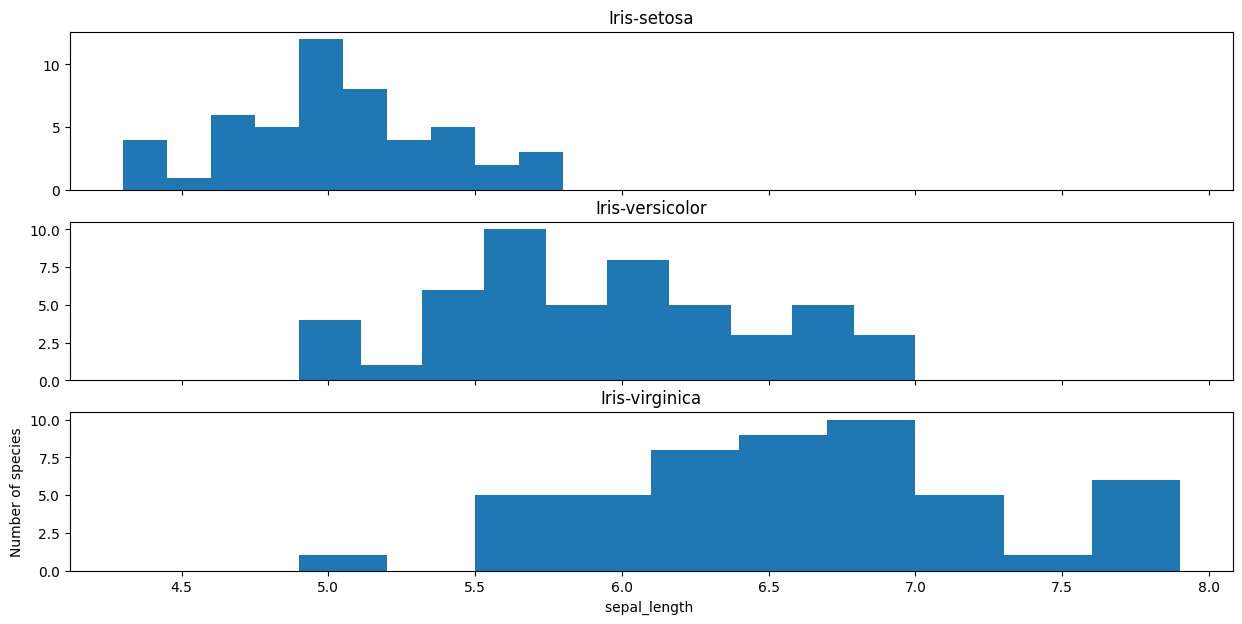

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,7))

ax1.hist(data["sepal_length"][data["species"] == 0], bins = 10)
ax1.set_title('Iris-setosa')

ax2.hist(data["sepal_length"][data["species"] == 1], bins = 10)
ax2.set_title('Iris-versicolor')

ax3.hist(data["sepal_length"][data["species"] == 2], bins = 10)
ax3.set_title('Iris-virginica')


plt.xlabel('sepal_length ')
plt.ylabel('Number of species')
plt.show()

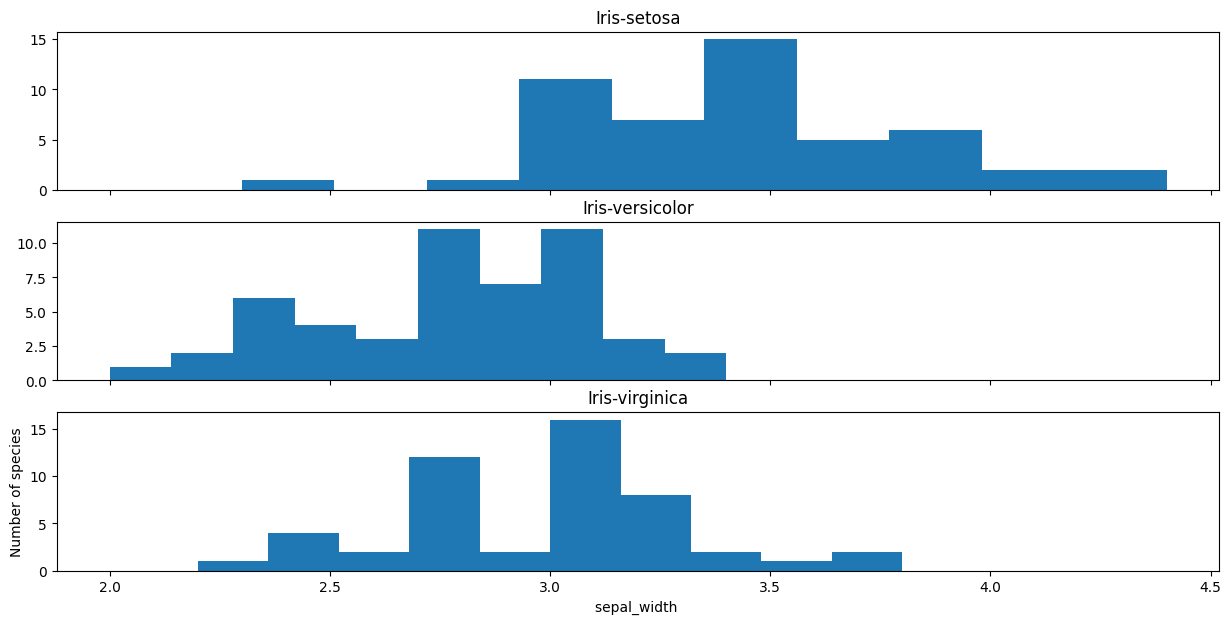

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,7))

ax1.hist(data["sepal_width"][data["species"] == 0], bins = 10)
ax1.set_title('Iris-setosa')

ax2.hist(data["sepal_width"][data["species"] == 1], bins = 10)
ax2.set_title('Iris-versicolor')

ax3.hist(data["sepal_width"][data["species"] == 2], bins = 10)
ax3.set_title('Iris-virginica')


plt.xlabel('sepal_width ')
plt.ylabel('Number of species')
plt.show()

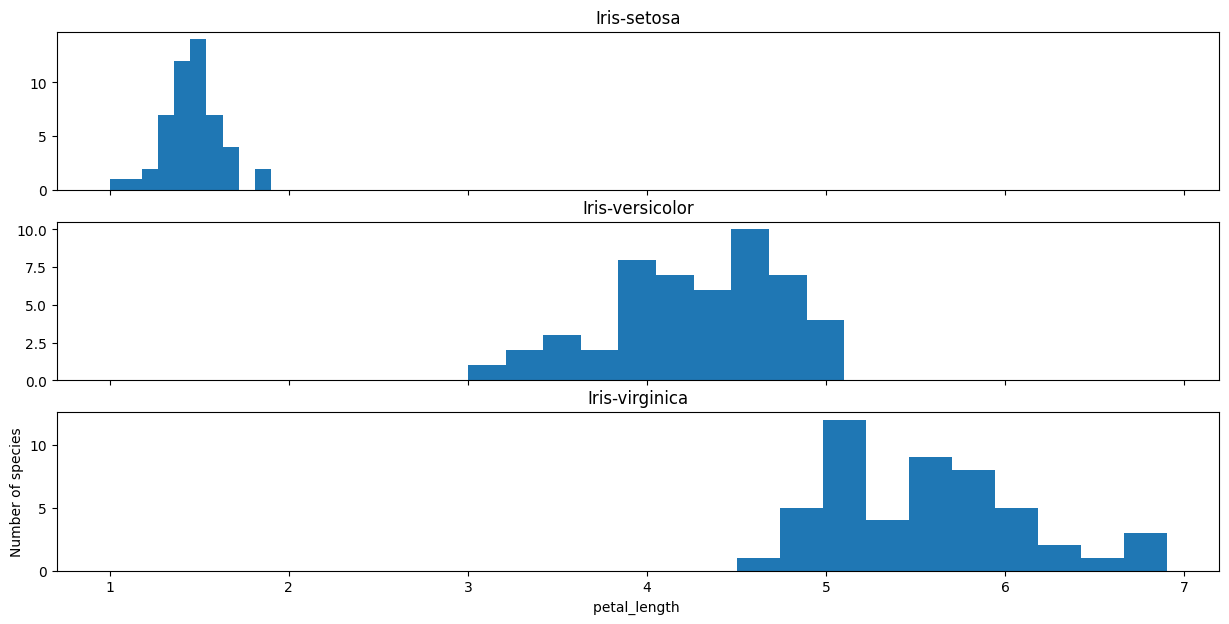

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,7))

ax1.hist(data["petal_length"][data["species"] == 0], bins = 10)
ax1.set_title('Iris-setosa')

ax2.hist(data["petal_length"][data["species"] == 1], bins = 10)
ax2.set_title('Iris-versicolor')

ax3.hist(data["petal_length"][data["species"] == 2], bins = 10)
ax3.set_title('Iris-virginica')



plt.xlabel('petal_length ')
plt.ylabel('Number of species')
plt.show()

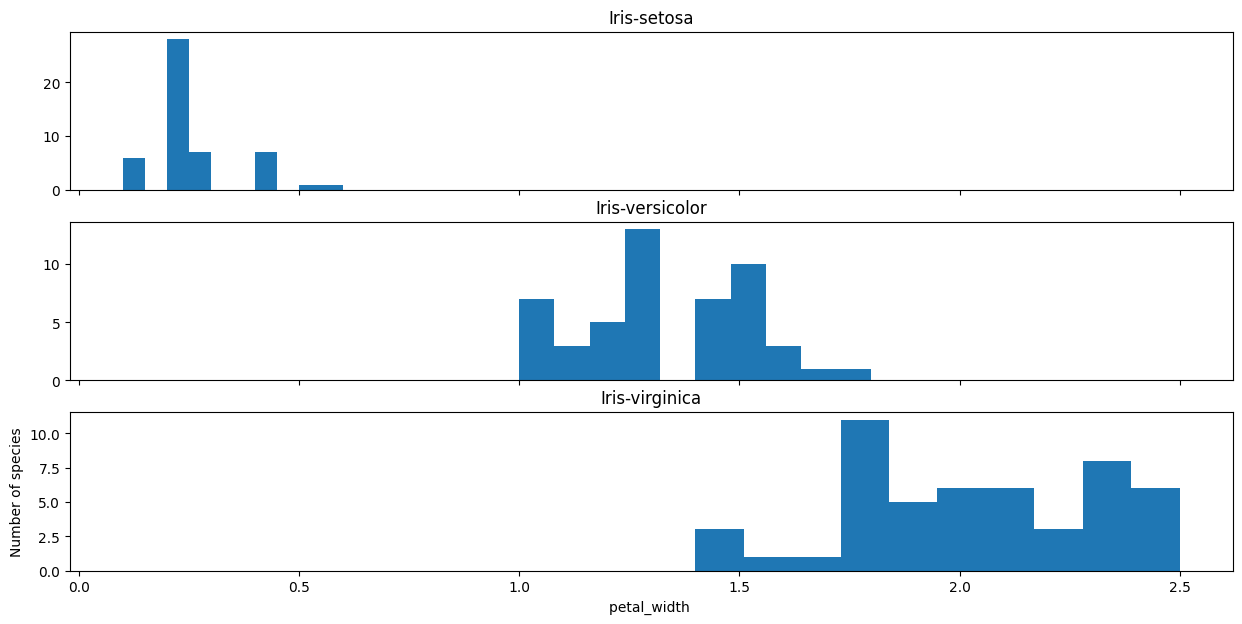

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(15,7))

ax1.hist(data["petal_width"][data["species"] == 0], bins = 10)
ax1.set_title('Iris-setosa')

ax2.hist(data["petal_width"][data["species"] == 1], bins = 10)
ax2.set_title('Iris-versicolor')

ax3.hist(data["petal_width"][data["species"] == 2], bins = 10)
ax3.set_title('Iris-virginica')



plt.xlabel('petal_width ')
plt.ylabel('Number of species')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['species'])
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

